In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,35
3,4,Female,23,16,77,29
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,57
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,57
198,199,Male,32,137,18,-1


In [4]:
X=dataset.iloc[:,[3,4]].values

/Users/vidhya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


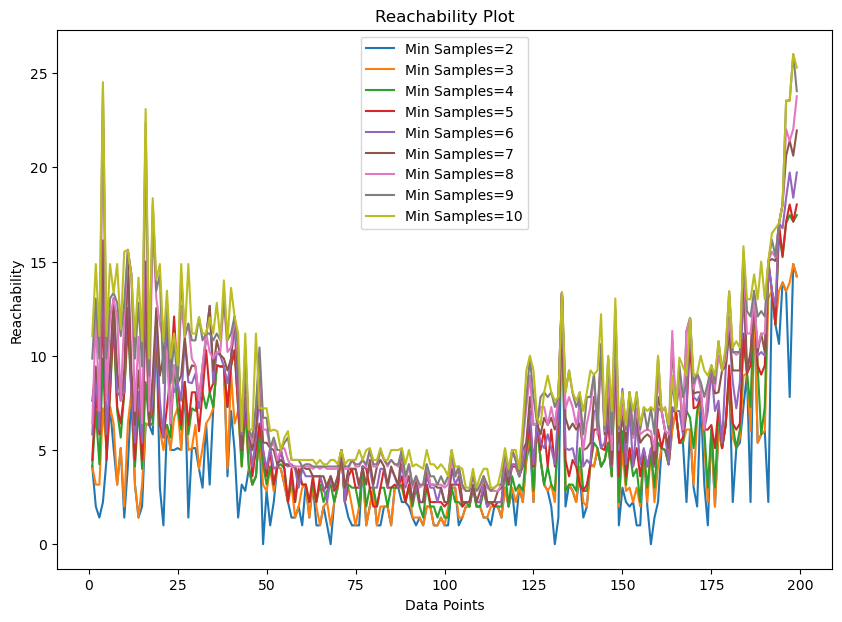

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS

# Generate sample data
np.random.seed(0)
n_points_per_cluster = 200


# Create a list to store reachability values for different min_samples
list1 = []

# Define a range of min_samples values to test, starting from 2
min_samples_range = range(2, 11)

# Calculate reachability for each min_samples value
for min_samples in min_samples_range:
    clustering = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
    clustering.fit(X)
    list1.append(clustering.reachability_)

# Plot reachability values for different min_samples
plt.figure(figsize=(10, 7))
for reachability, min_samples in zip(list1, min_samples_range):
    plt.plot(range(len(X)), reachability, label=f"Min Samples={min_samples}")

plt.title("Reachability Plot")
plt.xlabel('Data Points')
plt.ylabel('Reachability')
plt.legend()
plt.show()


In [6]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=2).fit(X)
clustering.labels_

/Users/vidhya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([ 0, -1, 35, 29,  0, 29, 35, 46, 35, -1, 34, 46, 34, 30, 34, 30,  1,
       -1, -1, 46,  1, 28, 36, 28, 33, 31,  2, -1,  2, 31, 36, 27, 36, 32,
       33, 31, 33, 27,  3, 27,  4, 32,  4, 13,  3, -1, -1, -1,  5,  5,  9,
       13,  9, 13,  6,  5, -1,  6,  8,  6, 10, 10,  8, 12,  8, 12,  8,  7,
       12,  7, 11, -1, -1, 11, 14, 16, 16, 14, 16, 15, 16, 16, 15, -1, 16,
       14, 18, 17, 18, -1, 17, -1, 21, -1, 23, -1, -1, 21, 23, 21, 23, 20,
       -1, 19, 19, 23, -1, 22, 23, 20, -1, 19, -1, 22, -1, -1, -1, 24, -1,
       24, 24, -1, 24, 51, -1, 48, 25, 51, 39, 48, 39, 48, 25, 47, 40, 51,
       40, 47, -1, 47, 40, 51, 26, 51, -1, 51, 26, 49, 37, 51, 38, 51, 37,
       50, 38, 51, 41, 50, 41, 49, 26, -1, -1, 51, 44, 54, 42, 52, 44, 54,
       42, 54, 42, 52, 42, -1, 42, 54, 42, 53, 45, 53, 42, 53, 45, -1, 43,
       55, 42, 53, 43, 55, 56, -1, 56, 57, -1, 57, -1, 57])

In [7]:
y_clustering =clustering .fit_predict(X)

/Users/vidhya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [8]:
supervised=dataset

In [9]:
supervised['Cluster_group']=y_clustering

In [10]:
supervised.to_csv('Mall_Customers.csv',index=False)

/Users/vidhya/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


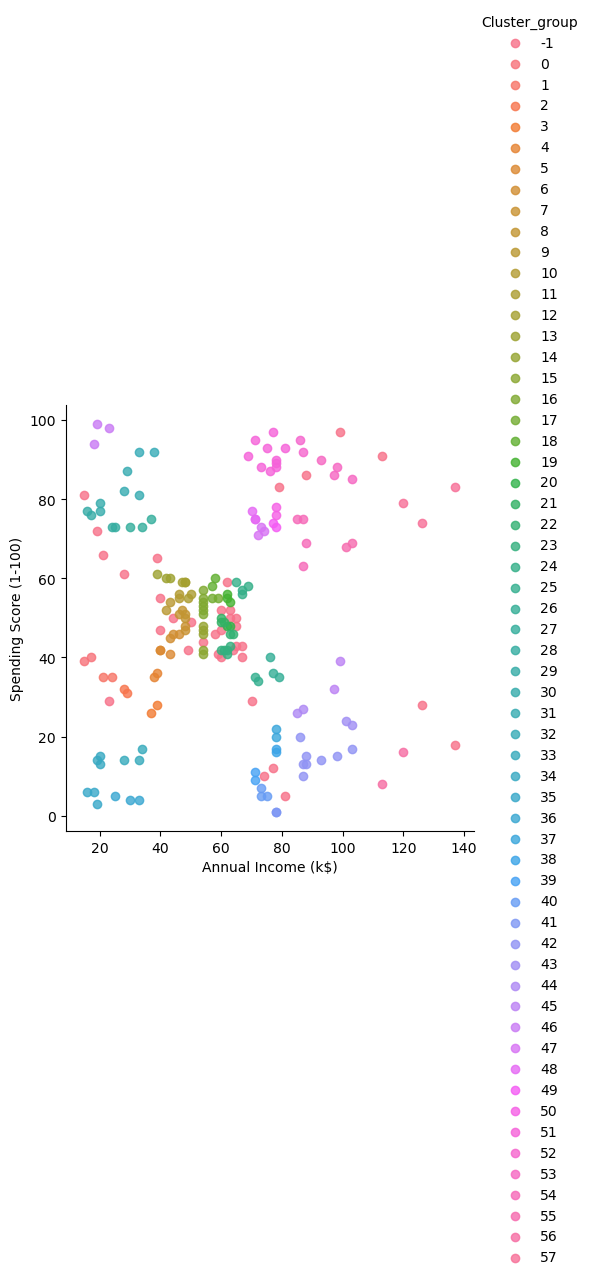

In [11]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)